In [ ]:
https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-finetune-rf-detr-on-detection-dataset.ipynb#scrollTo=3CbzMY6wITlr

In [ ]:

===================== ВЫБЕРИ ИЛИ СОЗДАЙ ОКРУЖЕНИЕ rfdetr_env ==========================================

conda create -n rfdetr_env python=3.11 -y
conda activate rfdetr_env
pip install ipykernel
python -m ipykernel install --user --name=rfdetr_kernel --display-name="rfdetr_env"
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
pip install rfdetr

In [ ]:
# pip install roboflow


In [ ]:
!pwd

In [29]:
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg

In [3]:
# Скачать датасет
from roboflow import Roboflow
rf = Roboflow(api_key="1xSkA1WLYlGLbcHdbDla")
project = rf.workspace("uav-qnoms").project("uav-wqshy")
version = project.version(6)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to UAV-6 in coco:: 100%|██████████████████████████| 8225/8225 [00:00<00:00, 10653.78it/s]


In [3]:
import transformers
print(f"✅ transformers: {transformers.__version__}")

# Теперь пробуем RF-DETR
try:
    from rfdetr import RFDETRNano
    
    model = RFDETRNano()
    print("🎉 RF-DETR загружен успешно!")
    
    # Проверим базовую информацию о модели
    #print(f"📊 Количество классов: {model.num_classes}")
    print("✅ RF-DETR готов к использованию!")
    
except Exception as e:
    print(f"❌ Ошибка RF-DETR: {e}")

✅ transformers: 4.57.1


rf-detr-nano.pth: 100%|█████████████████████████████████████████████████████████████| 349M/349M [00:24<00:00, 14.8MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights
🎉 RF-DETR загружен успешно!
✅ RF-DETR готов к использованию!


In [1]:
import transformers
print(f"✅ transformers: {transformers.__version__}")

# Теперь пробуем RF-DETR
try:
    from rfdetr import RFDETRMedium
    
    model = RFDETRMedium()
    print("🎉 RF-DETR загружен успешно!")
    
    # Проверим базовую информацию о модели
    #print(f"📊 Количество классов: {model.num_classes}")
    print("✅ RF-DETR готов к использованию!")
    
except Exception as e:
    print(f"❌ Ошибка RF-DETR: {e}")

✅ transformers: 4.57.1


rf-detr-medium.pth: 100%|███████████████████████████████████████████████████████████| 386M/386M [00:26<00:00, 15.1MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights
🎉 RF-DETR загружен успешно!
✅ RF-DETR готов к использованию!


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


Model is not optimized for inference. Latency may be higher than expected. You can optimize the model for inference by calling model.optimize_for_inference().


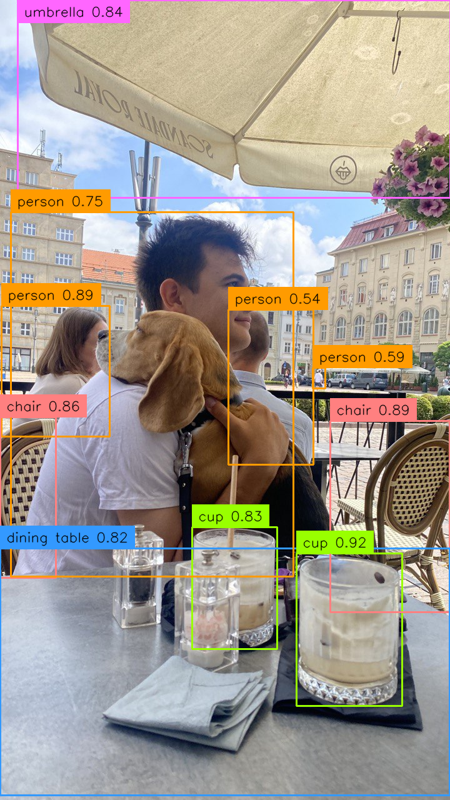

In [4]:
import numpy as np
import supervision as sv

from PIL import Image

from rfdetr import RFDETRMedium
from rfdetr.util.coco_classes import COCO_CLASSES

image = Image.open("dog-2.jpeg")

model = RFDETRNano(resolution=640)
#model.optimize_for_inference()

detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image.thumbnail((800, 800))
annotated_image

In [26]:
# Импортируем необходимые библиотеки
import os
from rfdetr import RFDETRMedium

# Определяем путь к вашему датасету
# Убедитесь, что вы указали правильный путь к вашему датасету
dataset_location = "/home/oleg/projects/ML/RT-DETR-RF-DETR/UAV-6"  # Замените на актуальный путь

# Создаем экземпляр модели
model = RFDETRNano()

# Параметры обучения
epochs = 3
batch_size = 16
grad_accum_steps = 1

# Проверяем, существует ли директория с данными
if not os.path.exists(dataset_location):
    raise ValueError(f"Указанный путь к датасету не существует: {dataset_location}")

# Начинаем обучение модели
model.train(dataset_dir=dataset_location,
            epochs=epochs,
            batch_size=batch_size,
            grad_accum_steps=grad_accum_steps,
            amp=True,
            verbose=True)

# Сохранение модели после обучения (опционально)
# model.save("rfdetr_medium_model.pth")

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights
Unable to initialize TensorBoard. Logging is turned off for this session.  Run 'pip install tensorboard' to enable logging.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=2, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=3, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-nano.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=Non

fatal: not a git repository (or any of the parent directories): .git


Epoch: [0]  [  0/468]  eta: 0:10:29  lr: 0.000100  class_error: 0.00  loss: 8.9229 (8.9229)  loss_ce: 1.7026 (1.7026)  loss_bbox: 0.5587 (0.5587)  loss_giou: 0.7411 (0.7411)  loss_ce_0: 1.8557 (1.8557)  loss_bbox_0: 0.5184 (0.5184)  loss_giou_0: 0.7094 (0.7094)  loss_ce_enc: 1.7943 (1.7943)  loss_bbox_enc: 0.4190 (0.4190)  loss_giou_enc: 0.6237 (0.6237)  loss_ce_unscaled: 1.7026 (1.7026)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.1117 (0.1117)  loss_giou_unscaled: 0.3706 (0.3706)  cardinality_error_unscaled: 15.3125 (15.3125)  loss_ce_0_unscaled: 1.8557 (1.8557)  loss_bbox_0_unscaled: 0.1037 (0.1037)  loss_giou_0_unscaled: 0.3547 (0.3547)  cardinality_error_0_unscaled: 3.2500 (3.2500)  loss_ce_enc_unscaled: 1.7943 (1.7943)  loss_bbox_enc_unscaled: 0.0838 (0.0838)  loss_giou_enc_unscaled: 0.3119 (0.3119)  cardinality_error_enc_unscaled: 66.0625 (66.0625)  time: 1.3460  data: 0.4079  max mem: 17012
Epoch: [0]  [ 10/468]  eta: 0:05:30  lr: 0.000100  class_error: 0.00  l

Epoch: [1]  [  0/468]  eta: 0:18:52  lr: 0.000100  class_error: 0.00  loss: 5.5295 (5.5295)  loss_ce: 0.6622 (0.6622)  loss_bbox: 0.3545 (0.3545)  loss_giou: 0.5458 (0.5458)  loss_ce_0: 1.0348 (1.0348)  loss_bbox_0: 0.3036 (0.3036)  loss_giou_0: 0.5793 (0.5793)  loss_ce_enc: 1.1310 (1.1310)  loss_bbox_enc: 0.3017 (0.3017)  loss_giou_enc: 0.6166 (0.6166)  loss_ce_unscaled: 0.6622 (0.6622)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0709 (0.0709)  loss_giou_unscaled: 0.2729 (0.2729)  cardinality_error_unscaled: 1.8125 (1.8125)  loss_ce_0_unscaled: 1.0348 (1.0348)  loss_bbox_0_unscaled: 0.0607 (0.0607)  loss_giou_0_unscaled: 0.2896 (0.2896)  cardinality_error_0_unscaled: 1.0625 (1.0625)  loss_ce_enc_unscaled: 1.1310 (1.1310)  loss_bbox_enc_unscaled: 0.0603 (0.0603)  loss_giou_enc_unscaled: 0.3083 (0.3083)  cardinality_error_enc_unscaled: 1.0625 (1.0625)  time: 2.4192  data: 0.3444  max mem: 17012
Epoch: [1]  [ 10/468]  eta: 0:13:51  lr: 0.000100  class_error: 0.00  loss:

KeyboardInterrupt: 

In [25]:
import gc
import torch
import weakref

def cleanup_gpu_memory(obj=None, verbose: bool = False):

    if not torch.cuda.is_available():
        if verbose:
            print("[INFO] CUDA is not available. No GPU cleanup needed.")
        return

    def get_memory_stats():
        allocated = torch.cuda.memory_allocated()
        reserved = torch.cuda.memory_reserved()
        return allocated, reserved

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[Before] Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

    # Ensure we drop all strong references
    if obj is not None:
        ref = weakref.ref(obj)
        del obj
        if ref() is not None and verbose:
            print("[WARNING] Object not fully garbage collected yet.")

    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[After]  Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

cleanup_gpu_memory(model, verbose=True)        

[Before] Allocated: 2067.38 MB | Reserved: 6528.00 MB
[WARNING] Object not fully garbage collected yet.
[After]  Allocated: 1696.41 MB | Reserved: 5370.00 MB
